## Inital exploration of data

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Load your dataset
ds = xr.open_dataset("hycom2016/010_archv_2016_001_00_2d.nc")
print(ds)

<xarray.Dataset> Size: 78MB
Dimensions:                (MT: 1, Latitude: 1537, Longitude: 2101)
Coordinates:
    Date                   (MT) float64 8B ...
  * Latitude               (Latitude) float32 6kB 18.09 18.1 ... 31.95 31.96
  * Longitude              (Longitude) float32 8kB -98.0 -97.99 ... -77.01 -77.0
  * MT                     (MT) datetime64[ns] 8B 2016-01-01
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 13MB ...
    ssh                    (MT, Latitude, Longitude) float32 13MB ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 13MB ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 13MB ...
    wnd_ewd                (MT, Latitude, Longitude) float32 13MB ...
    wnd_nwd                (MT, Latitude, Longitude) float32 13MB ...
Attributes:
    Conventions:                CF-1.6
    title:                      HYCOM
    source:                     HYCOM archive file
    experiment:                 01.0
    comment:

In [3]:
u=ds['u_barotropic_velocity']
print(u)

<xarray.DataArray 'u_barotropic_velocity' (MT: 1, Latitude: 1537,
                                           Longitude: 2101)> Size: 13MB
[3229237 values with dtype=float32]
Coordinates:
    Date       (MT) float64 8B ...
  * Latitude   (Latitude) float32 6kB 18.09 18.1 18.11 ... 31.94 31.95 31.96
  * Longitude  (Longitude) float32 8kB -98.0 -97.99 -97.98 ... -77.01 -77.0
  * MT         (MT) datetime64[ns] 8B 2016-01-01
Attributes:
    standard_name:  barotropic_eastward_sea_water_velocity
    units:          m/s
    valid_range:    [-1.2002983  1.37218  ]
    long_name:          baro. u-vel.   [01.0H]


### Thoughts
1. we want to isolate a slice of current data based on the ingestion information present form [this paper](https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2020.00693/full). Ideally the area should spread onto the ocean. 
2. Latitude=(29.5, 30.5), Longitude(-81.5, -80.5) are an initial starting point

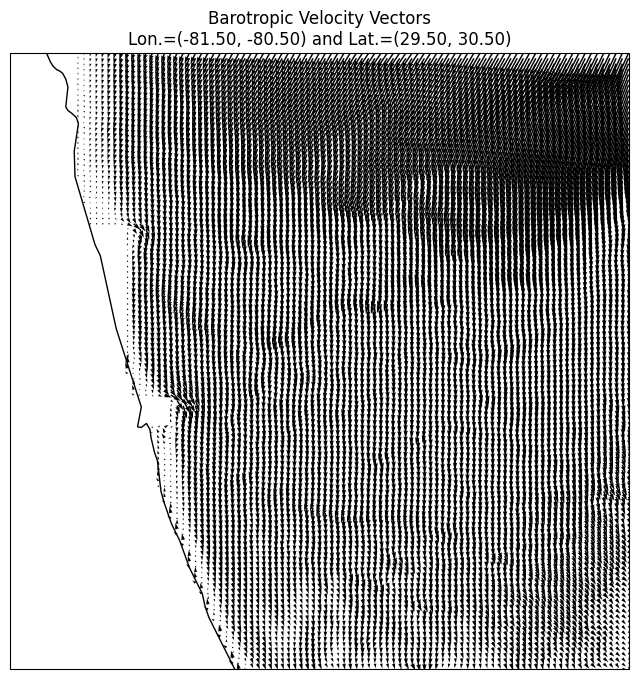

In [36]:
# Select region
uspec = u.sel(Latitude=slice(29.5, 30.5), Longitude=slice(-81.5, -80.5))
vspec = ds['v_barotropic_velocity'].sel(Latitude=slice(29.5, 30.5), Longitude=slice(-81.5, -80.5))

#coordinate and grid
lat = uspec['Latitude'].values
lon = uspec['Longitude'].values
lon_min = lon.min()
lon_max = lon.max()
lat_min = lat.min()
lat_max = lat.max()
lon2d, lat2d = np.meshgrid(lon, lat)


u_data = uspec.isel(MT=0).values
v_data = vspec.isel(MT=0).values

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

quiver = ax.quiver(lon2d, lat2d, u_data, v_data, 
                   scale=5, transform=ccrs.PlateCarree())

plt.title(f"Barotropic Velocity Vectors\nLon.=({lon_min:.2f}, {lon_max:.2f}) and Lat.=({lat_min:.2f}, {lat_max:.2f})")
plt.show()


### Ideas for 4/30/25
1. make a function to take .nc file and spit out a matrix with the velocity currents 
    - Then we can see variation over a day, and establish some good time range
2. turtles spend time in a certain square. Then move. In a given time they are assumed to interact with:
    -prey and plastic
3. How can we impliment dying?
4. Turtles must accumulate plastic

### To-do 4/30/25
1. get a spacially explicit model with discrete grid up and running
2. overlay with map

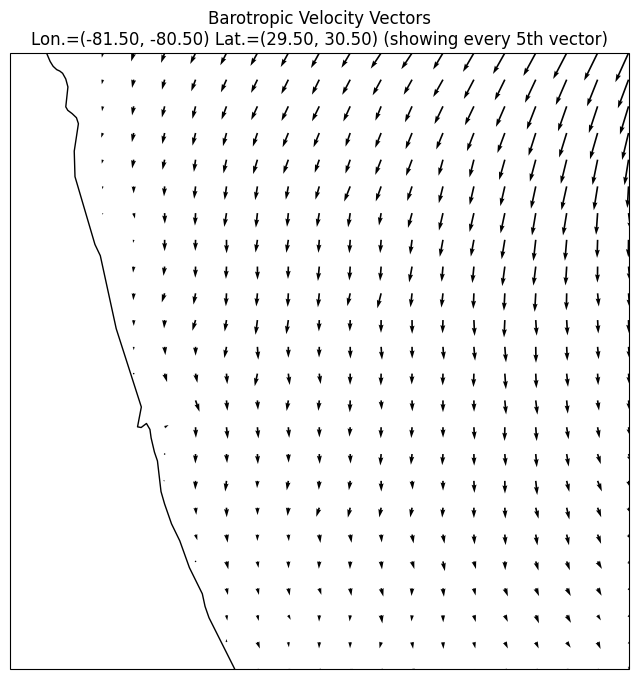

In [38]:
from utilities import *

plotdvx(lon2d, lat2d, u_data, v_data, [lon.min(), lon.max(), lat.min(), lat.max()], 5)